# Trains and  tests on parts of  NA12878 data for Del_st, Del_end and No_sv, ground  truth Mills_nanosv

## Load dependences and setting output configuration

In [1]:
import numpy as np
from keras.utils.np_utils import to_categorical
import keras
%pylab inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


## Load data from npy files

In [2]:
import pickle
dico = pickle.load(open("F:/1_GTCG/data/11092018/labels.pickle/labels.pickle", "rb"))
labels = dataset = dico["Mills2011_nanosv"]
window_size = 200

In [3]:
dico = []

In [8]:
datapath = 'F:/1_GTCG/data/TestData_060818.tar/TestData_060818/NA12878' 

germline_1_datapath = datapath + '/ChannelData/unzipped/'
ger_1_labels_datapath = datapath + '/LabelData/unzipped/'

G1_data_SV = np.empty([0, 27, window_size])
G1_labels_SV =[]
G1_data_noSV = np.empty([0, 27, window_size])
G1_labels_noSV =[]

for i in range(1,18,1):
        G1_data_new =np.load(germline_1_datapath + str(i) + '_channel_maker_real_germline.npy/' + str(i) +'_channel_maker_real_germline.npy')
        #G1_labels_new = np.load(ger_1_labels_datapath  +  str(i) +'_label_ci_full_overlap.npy/' +str(i) +'_label_ci_full_overlap.npy') 
        G1_labels_new = np.array(labels[str(i)])
        print(G1_labels_new[0])
        G1_data_new = G1_data_new[np.where(G1_labels_new != 'UK')]
        G1_labels_new = G1_labels_new[np.where(G1_labels_new != 'UK')]
        G1_data_SV_new  = G1_data_new[np.where(G1_labels_new != 'noSV')]
        G1_labels_SV_new  = G1_labels_new[np.where(G1_labels_new != 'noSV')]
        n_windows_sv = G1_data_SV_new.shape[0]
        G1_data_noSV_new  = G1_data_new[np.where(G1_labels_new == 'noSV')]
        G1_labels_noSV_new  = G1_labels_new[np.where(G1_labels_new == 'noSV')]
        G1_data_noSV_new =  G1_data_noSV_new[0:n_windows_sv]
        G1_labels_noSV_new =  G1_labels_noSV_new[0:n_windows_sv]
        print(str(i) + ':' + str(G1_data_SV_new.shape))
        print(G1_labels_SV_new[0])
        G1_data_SV = np.concatenate((G1_data_SV, G1_data_SV_new))
        G1_labels_SV = np.concatenate((G1_labels_SV, G1_labels_SV_new))
        G1_data_noSV = np.concatenate((G1_data_noSV, G1_data_noSV_new))
        G1_labels_noSV = np.concatenate((G1_labels_noSV, G1_labels_noSV_new))

noSV
1:(222, 27, 200)
DEL_start
noSV
2:(205, 27, 200)
DEL_start
noSV
3:(208, 27, 200)
DEL_start
noSV
4:(228, 27, 200)
DEL_start
noSV
5:(214, 27, 200)
DEL_end
noSV
6:(162, 27, 200)
DEL_start
noSV
7:(163, 27, 200)
DEL_start
noSV
8:(135, 27, 200)
DEL_start
noSV
9:(127, 27, 200)
DEL_start
noSV
10:(107, 27, 200)
DEL_start
noSV
11:(119, 27, 200)
DEL_start
noSV
12:(114, 27, 200)
DEL_start
noSV
13:(106, 27, 200)
DEL_start
noSV
14:(66, 27, 200)
DEL_start
noSV
15:(61, 27, 200)
DEL_end
noSV
16:(47, 27, 200)
DEL_start
noSV
17:(48, 27, 200)
DEL_end


### Find  the indexes that split the categories

In [9]:
def find_splitting_indices(labels):
    for i in range (0, labels.shape[0] - 1):
        if (labels[i] != labels[i+1]):
            print(i , ': ', labels[i] , labels[i+1] )        

In [5]:
#find_splitting_indices(G1_labels)

In [6]:
#G1_labels_SV = ['DEL'] * G1_labels_SV.shape[0]

In [10]:
sv=G1_data_SV.shape[0]

In [11]:
sv

2332

In [12]:
int(sv/2)

1166

In [13]:
G1_data_noSV  = G1_data_noSV[0:int(sv/2)] 

In [14]:
G1_labels_noSV  = G1_labels_noSV[0:int(sv/2)] 

In [91]:
SV_train = 1600
noSV_train = 800
SV_val = 350
noSV_val = 175

In [92]:
X_train = np.concatenate((G1_data_SV[0:SV_train], G1_data_noSV[0:noSV_train ]))
X_val = np.concatenate((G1_data_SV[SV_train:SV_train+SV_val], G1_data_noSV[noSV_train:noSV_train +noSV_val ]))
X_test = np.concatenate((G1_data_SV[SV_train+SV_val:], G1_data_noSV[noSV_train +noSV_val:]))

In [213]:
y_train = np.concatenate((G1_labels_SV[0:SV_train], G1_labels_noSV[0:noSV_train ]))
y_val = np.concatenate((G1_labels_SV[SV_train:SV_train+SV_val], G1_labels_noSV[noSV_train:noSV_train +noSV_val ]))
y_test = np.concatenate((G1_labels_SV[SV_train+SV_val:], G1_labels_noSV[noSV_train +noSV_val:]))

### Number of training, validation and test windows

In [94]:
X_train.shape

(2400, 27, 200)

In [95]:
X_val.shape

(525, 27, 200)

In [96]:
X_test.shape

(573, 27, 200)

In [97]:
y_test.shape

(573,)

In [98]:
number_channels = X_train.shape[1]
number_channels

27

## Normalize data using the reads coverage as parameter and remove uninteresting channels for deletions

In [99]:
coverage = np.median(X_train[:, 0, :]) #the median of the coverage in the normal cells
coverage


37.0

In [100]:
def normalize(X):       
    for i in range (0, len(X)):                              
        for j in range(0,number_channels):                                                                                            
            X[i][j] = np.divide(X[i][j], coverage)*100 
normalize(X_train)
normalize(X_val)
normalize(X_test)

In [101]:
def eliminate_noise_chanels(X):
    return np.delete(X, [4-1,5-1,6-1,7-1,8-1,9-1,10-1,12-1,13-1,15-1,16-1, 17-1,18-1,19-1,23-1,24-1,26-1,27-1], axis=1)
    

In [102]:
def eliminate_distance_chanels(X):
    return np.delete(X, [3,4,7,8], axis=1)

In [103]:
X_train = eliminate_noise_chanels(X_train)
X_val = eliminate_noise_chanels(X_val)
X_test = eliminate_noise_chanels(X_test)

In [104]:
X_train = eliminate_distance_chanels(X_train)
X_val = eliminate_distance_chanels(X_val)
X_test = eliminate_distance_chanels(X_test)

In [105]:
X_train.shape

(2400, 5, 200)

In [106]:
number_channels = X_train.shape[1]
number_channels

5

## Differentiate the time series for a zero mean

In [107]:
def differentiate(X):
    for i in range(0, X.shape[0]):        
        for j in range(0, X.shape[1]):
            for k in range(0, X.shape[2]-1):
                X[i][j][k] = X[i][j][k+1] - X[i][j][k]
    return X[:,:,:-1]        

In [108]:
X_train = differentiate(X_train)

In [109]:
X_val = differentiate(X_val)
X_test = differentiate(X_test)

## Plots several  windows

In [110]:
n_windows = 100
label = ["None"] * number_channels

In [111]:
label[0] = "germline:coverage"
label[1] = "germline:#left clipped reads"
label[2] = "germline:#right clipped reads"
label[3] = "germline:#split reads right split"
label[4] = "germline:#split reads left split"

In [214]:
from numpy import *
import math
import matplotlib.pyplot as plt

colors =['b','g', 'm', 'gray', 'r','c', 'darkgreen' ,'y', 'k', 'orange', 'gray']

def plot_channels(start_window, n_windows):
    for i in range (start_window, start_window + n_windows, 1):
        if y_test[i] == labels[predicted[i]]:
            continue
        #print(y_train[i], 'id:', i)
        print('id:', i)
        print('Nanopore:', y_test[i], '. DeepSV:', labels[predicted[i]])
        for j in range (0, number_channels):   
            shift = 0
            start =0
            if j in [0,11]:
                shift = -100
            if j > 8:
                start = -60
            Z = [start + shift + 300 + x - 5*j*4 for x in X_test[i][j]]  
            plt.ylim([150,450])
            if np.max(Z) > 1000:
                plt.ylim([-200,1000])
                Z = [start + shift + 300 + x - 5*j*4 - 400 for x in X_test[i][j]]  
            if j>8:
                plt.plot(Z,  label = label[j], linestyle=':', linewidth=1.5, color = colors[j % 9])
            else:
                plt.plot(Z,  label = label[j], color = colors[j])
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 10})    
        plt.show()

id: 45
Nanopore: DEL_end . DeepSV: noSV


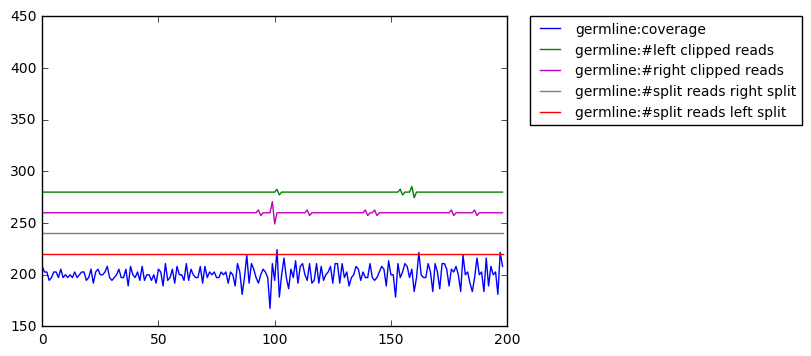

id: 56
Nanopore: DEL_start . DeepSV: noSV


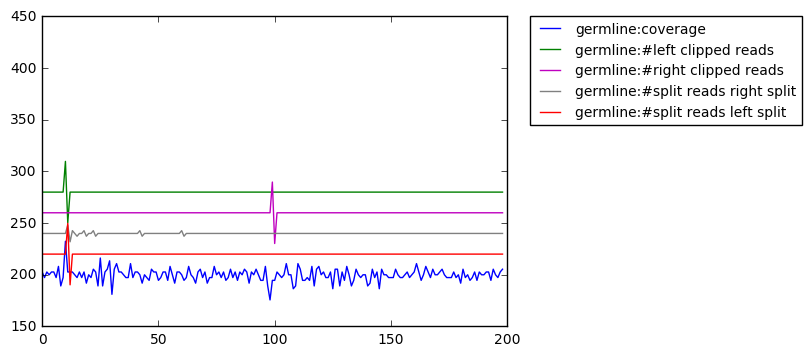

id: 222
Nanopore: DEL_start . DeepSV: noSV


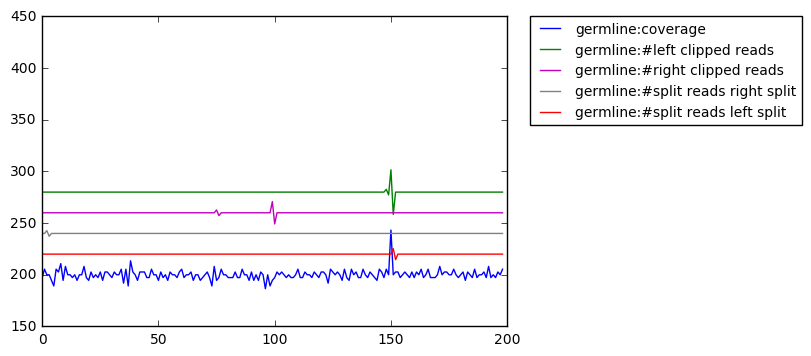

id: 223
Nanopore: DEL_start . DeepSV: noSV


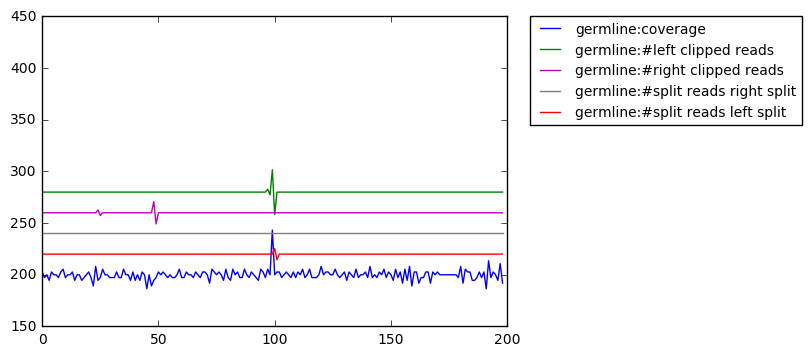

id: 269
Nanopore: DEL_start . DeepSV: noSV


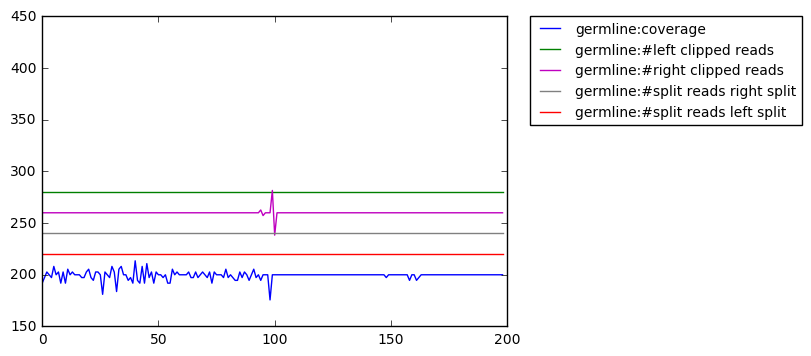

id: 270
Nanopore: DEL_end . DeepSV: noSV


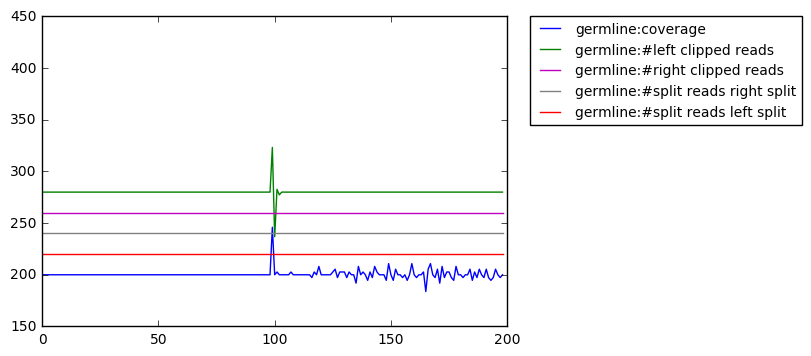

id: 291
Nanopore: DEL_end . DeepSV: DEL_start


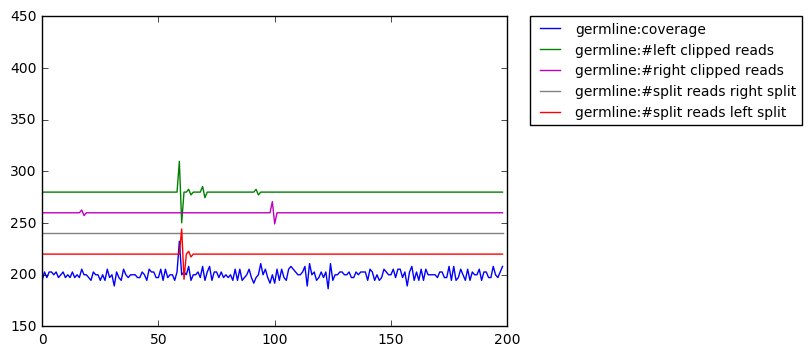

id: 323
Nanopore: DEL_start . DeepSV: DEL_end


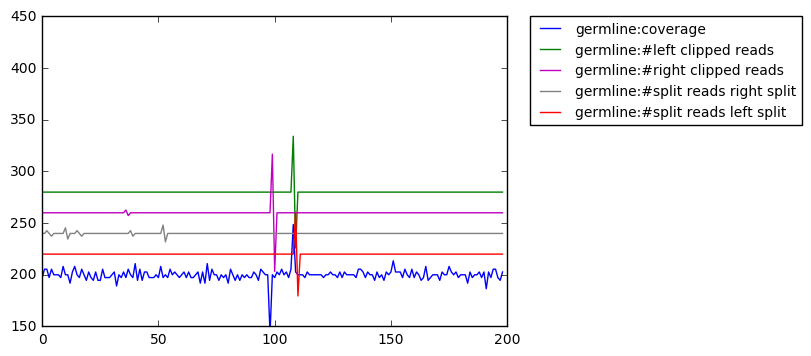

id: 330
Nanopore: DEL_end . DeepSV: noSV


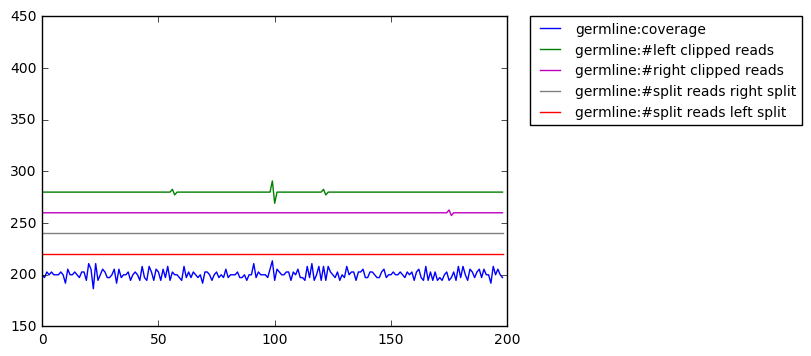

id: 333
Nanopore: DEL_start . DeepSV: noSV


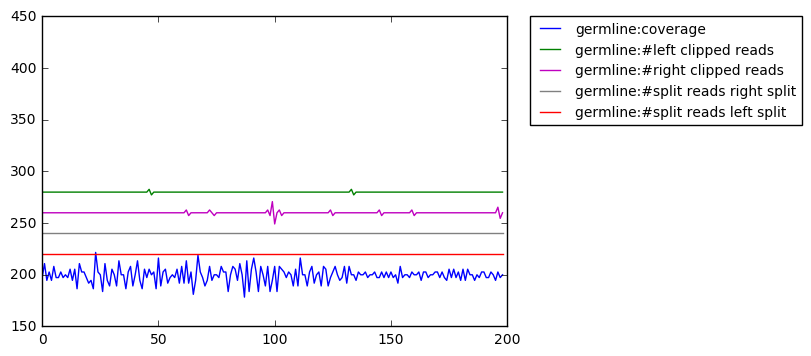

id: 334
Nanopore: DEL_end . DeepSV: noSV


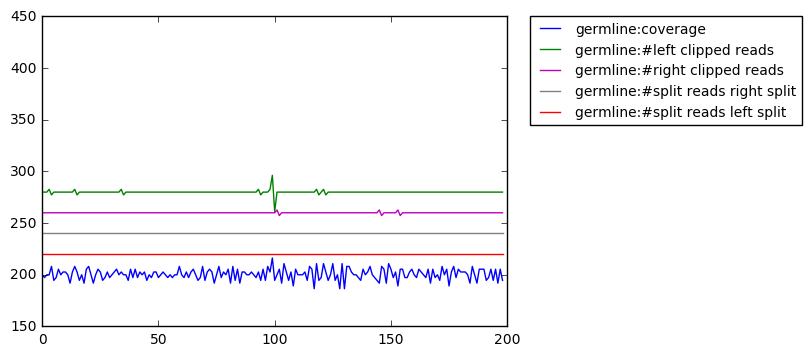

id: 347
Nanopore: DEL_start . DeepSV: noSV


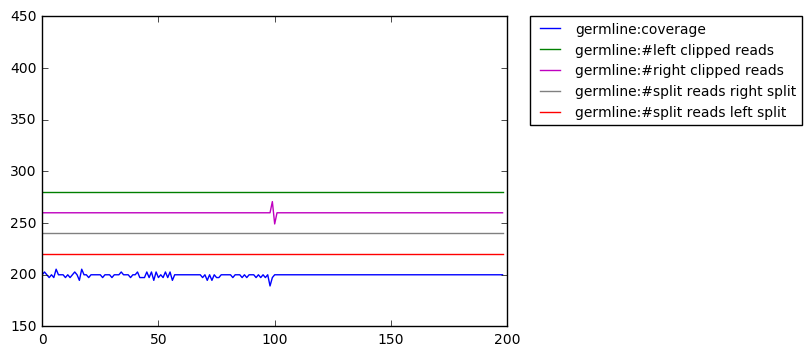

id: 357
Nanopore: DEL_end . DeepSV: DEL_start


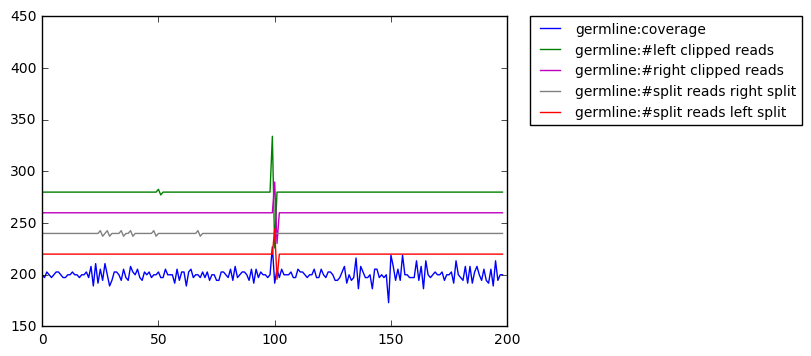

id: 447
Nanopore: noSV . DeepSV: DEL_start


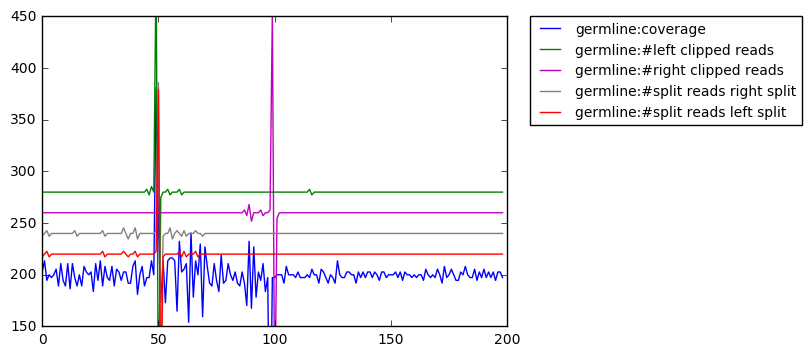

id: 448
Nanopore: noSV . DeepSV: DEL_start


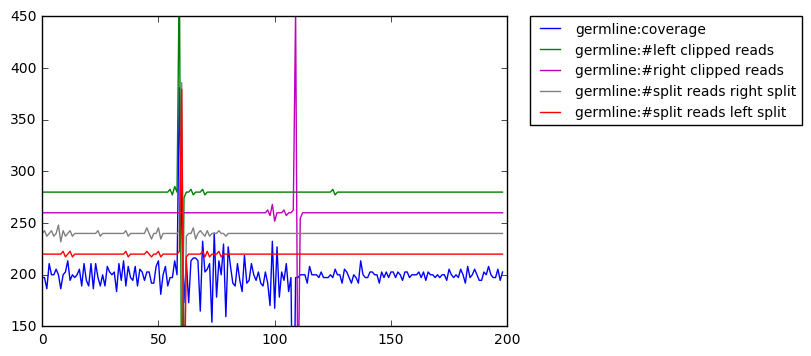

id: 449
Nanopore: noSV . DeepSV: DEL_start


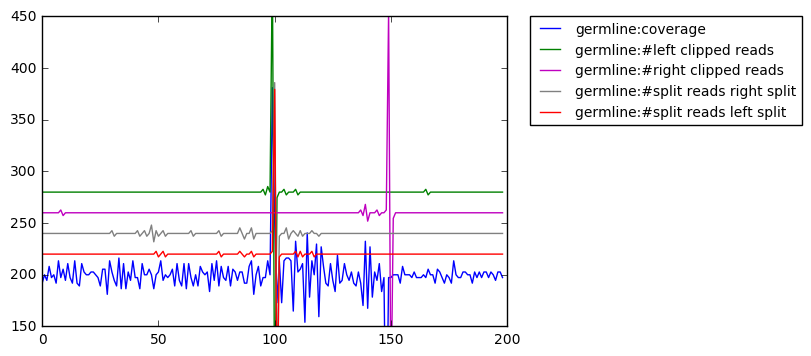

In [215]:
start_window = 0
n_windows = 573
plot_channels(start_window, n_windows)

id: 500
Nanopore: noSV


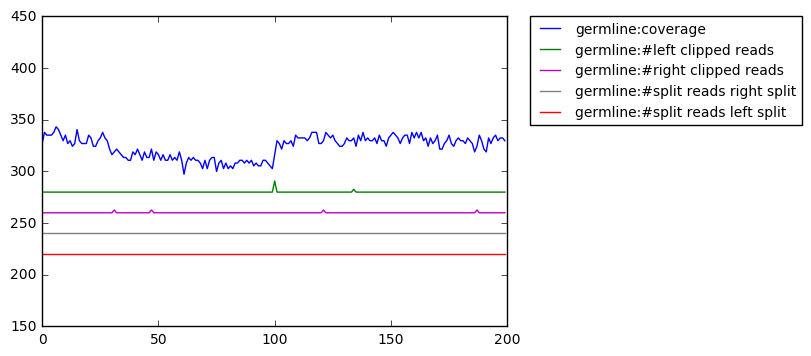

id: 501
Nanopore: noSV


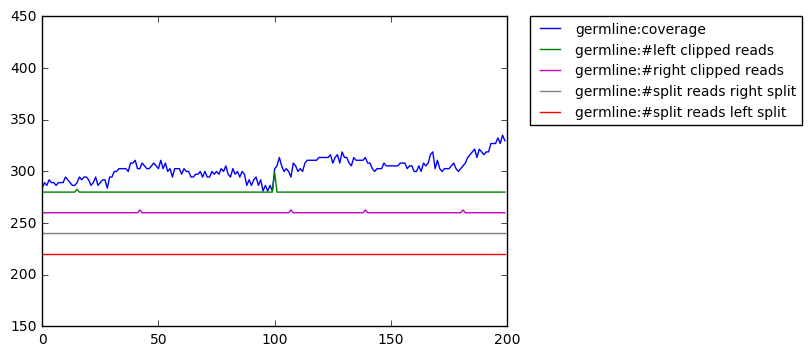

id: 502
Nanopore: noSV


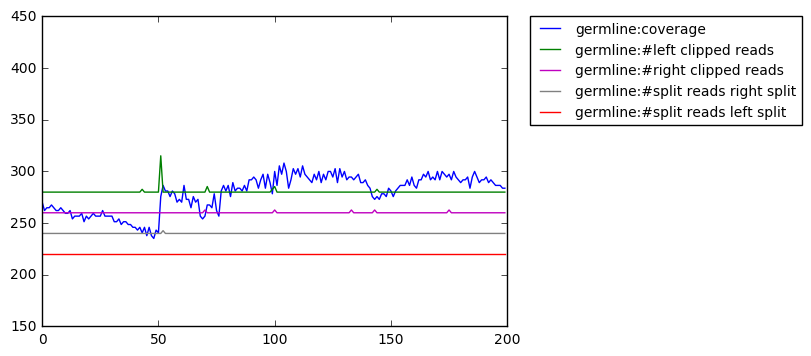

id: 503
Nanopore: noSV


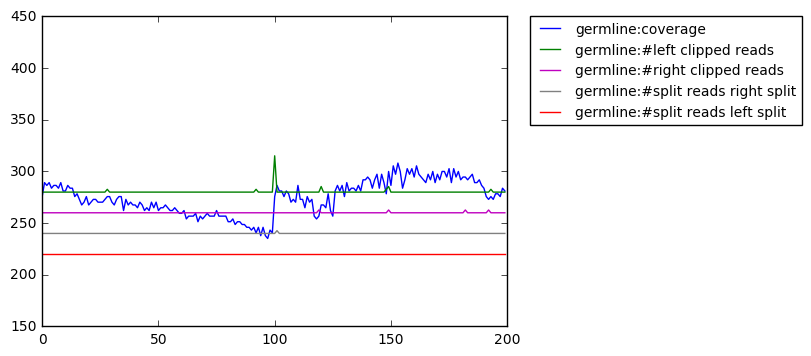

id: 504
Nanopore: noSV


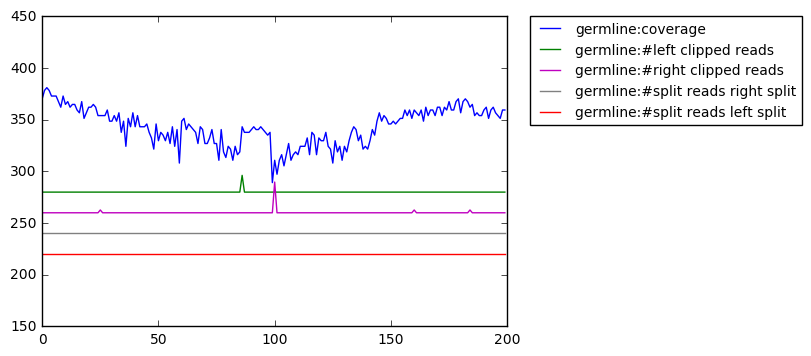

id: 505
Nanopore: noSV


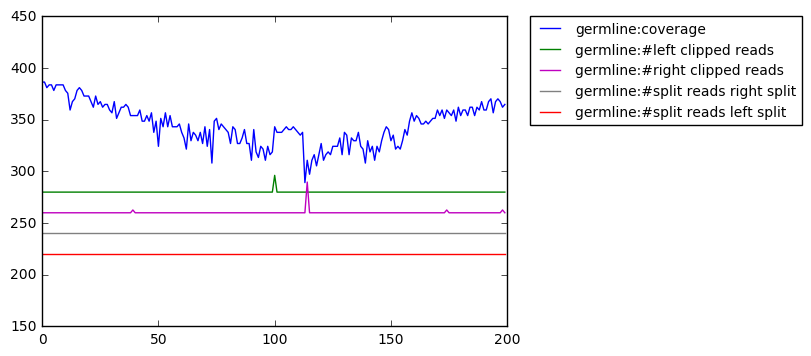

id: 506
Nanopore: noSV


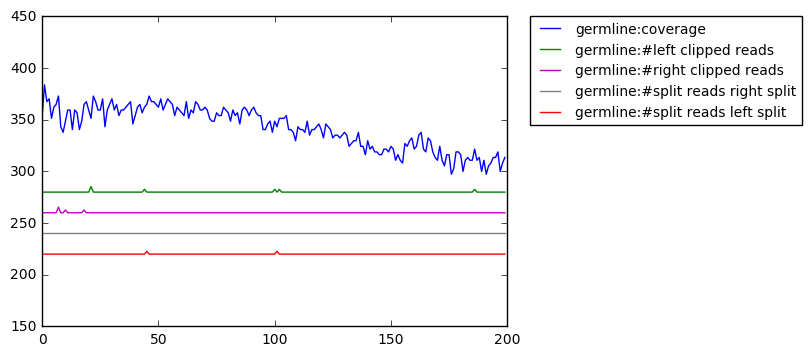

id: 507
Nanopore: noSV


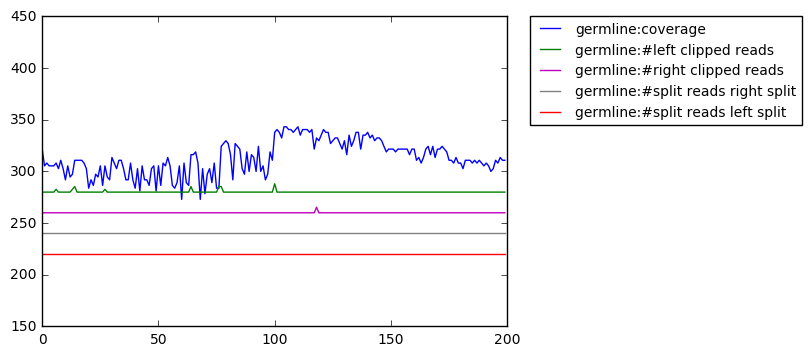

id: 508
Nanopore: noSV


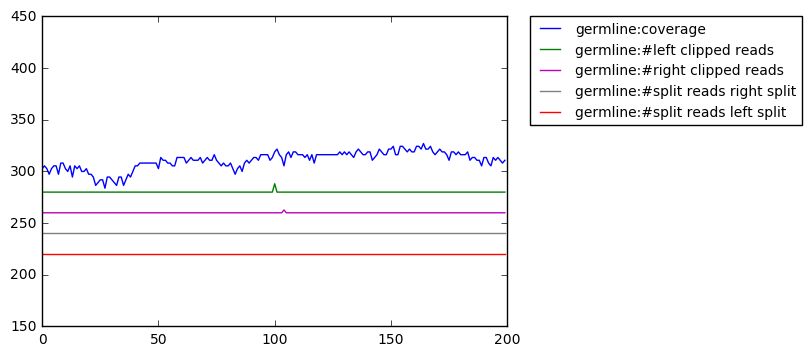

id: 509
Nanopore: noSV


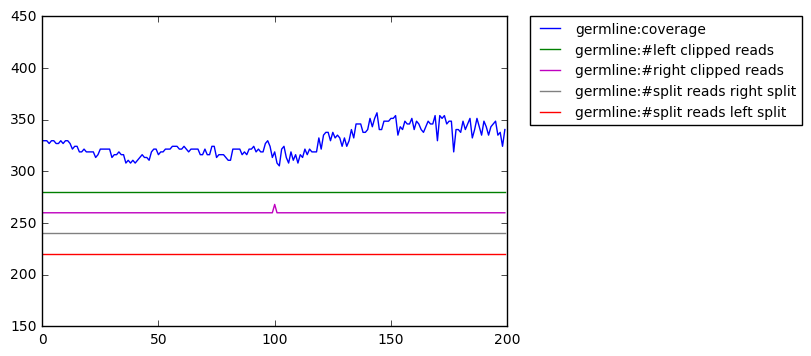

id: 510
Nanopore: noSV


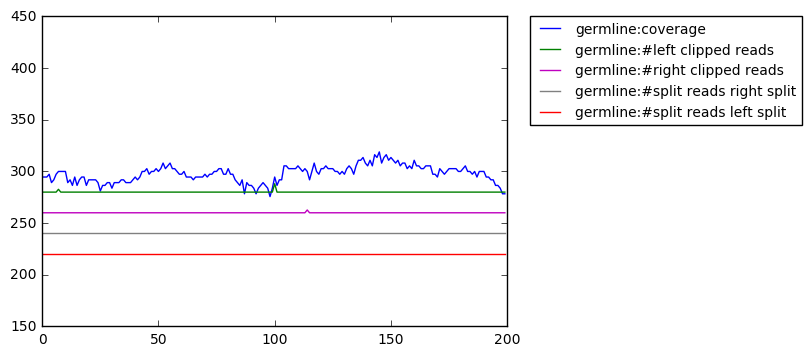

id: 511
Nanopore: noSV


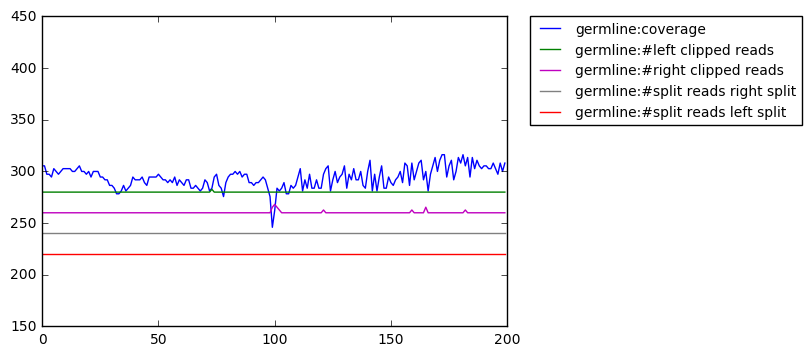

id: 512
Nanopore: noSV


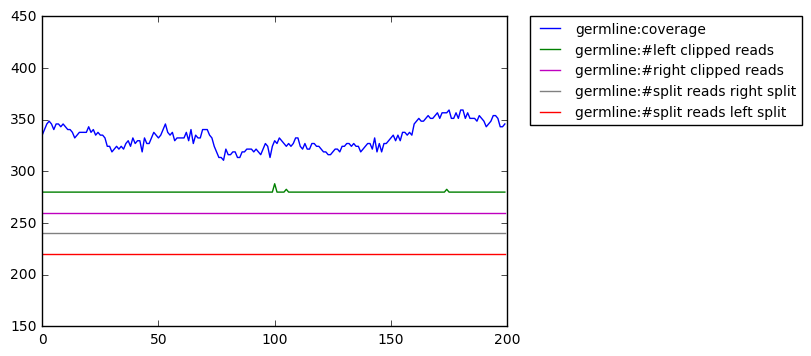

id: 513
Nanopore: noSV


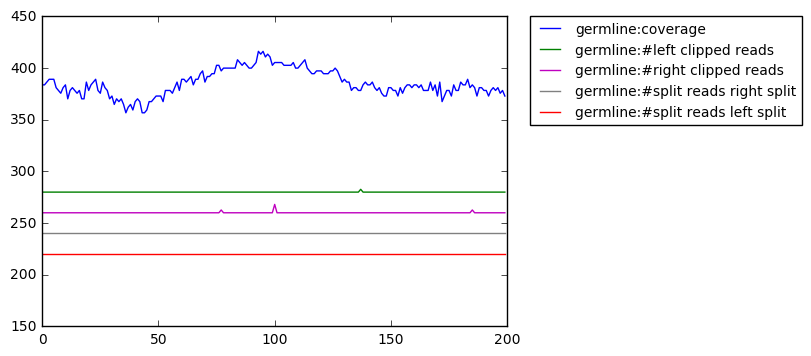

id: 514
Nanopore: noSV


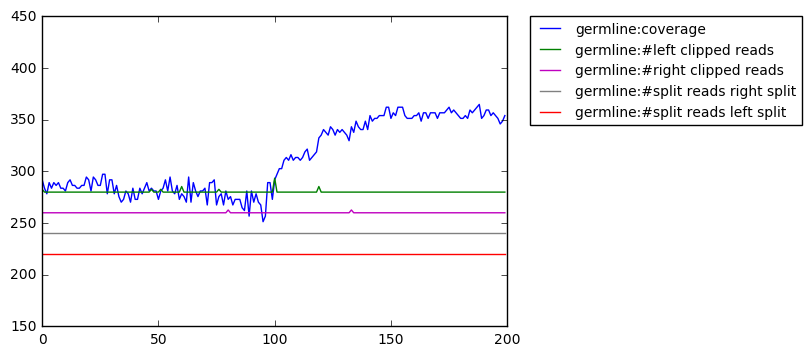

id: 515
Nanopore: noSV


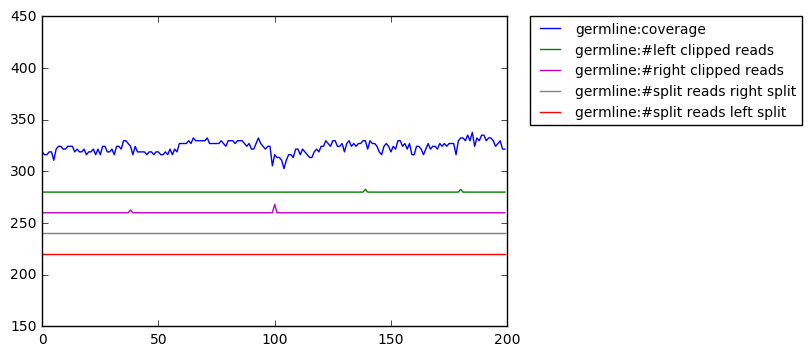

id: 516
Nanopore: noSV


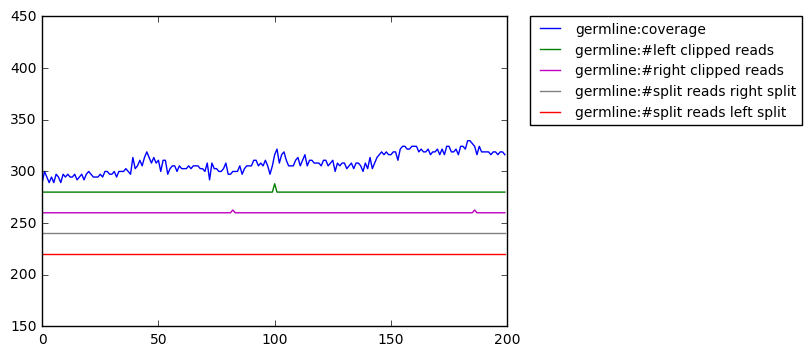

id: 517
Nanopore: noSV


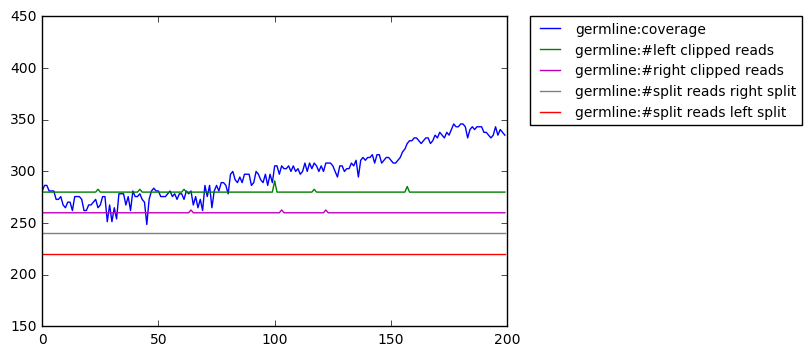

id: 518
Nanopore: noSV


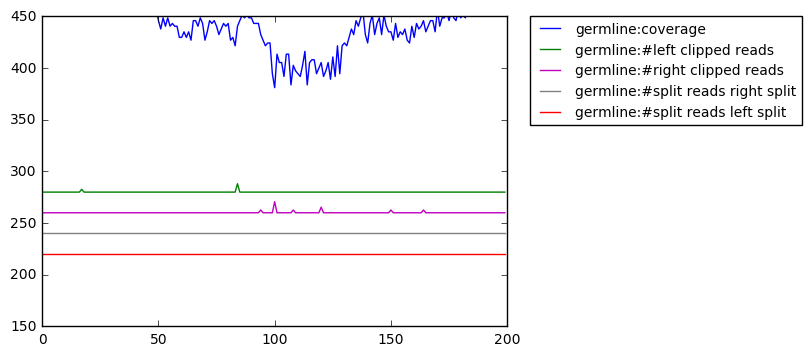

id: 519
Nanopore: noSV


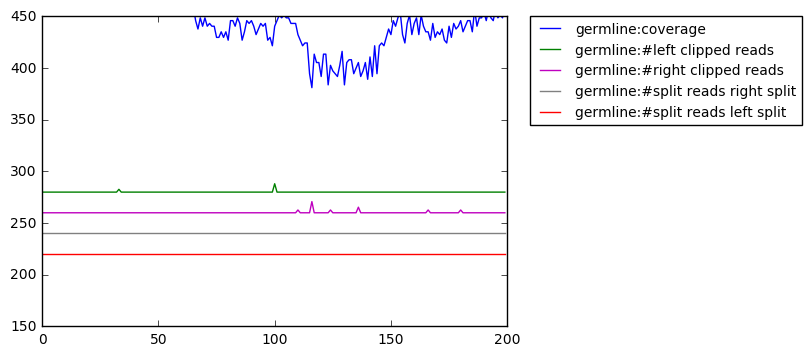

id: 520
Nanopore: noSV


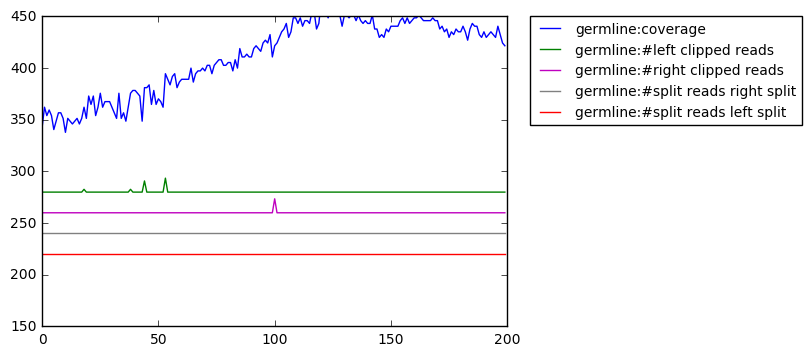

id: 521
Nanopore: noSV


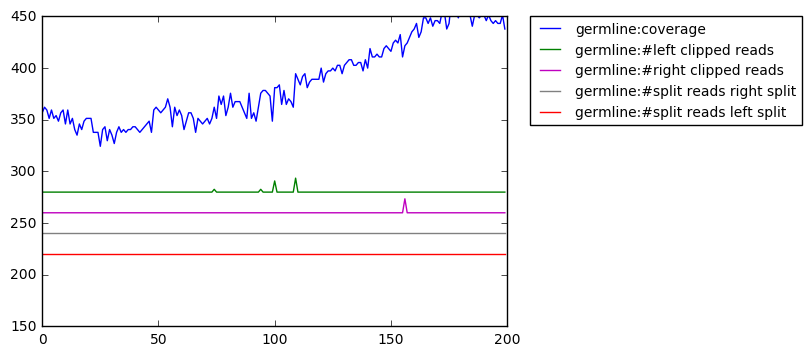

id: 522
Nanopore: noSV


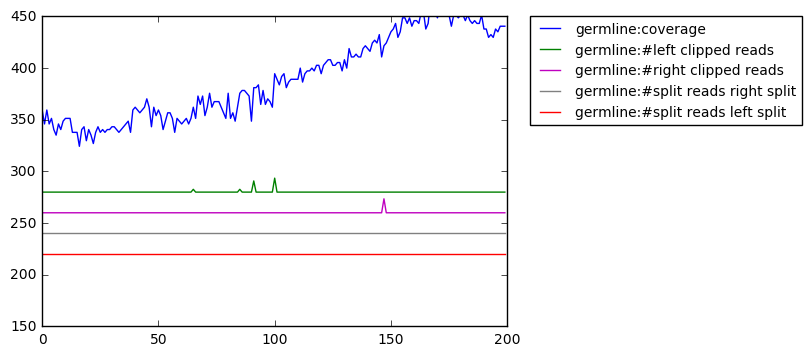

id: 523
Nanopore: noSV


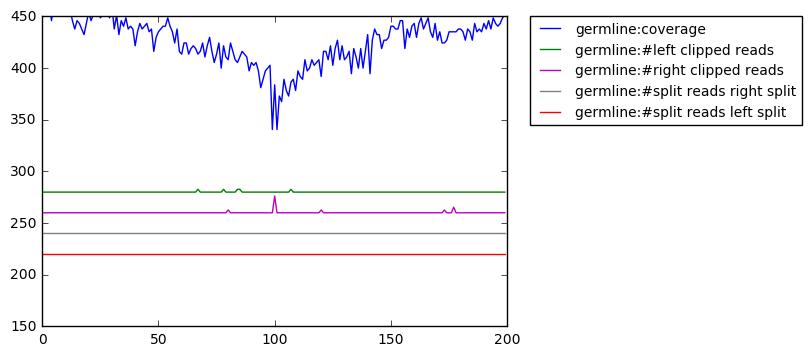

id: 524
Nanopore: noSV


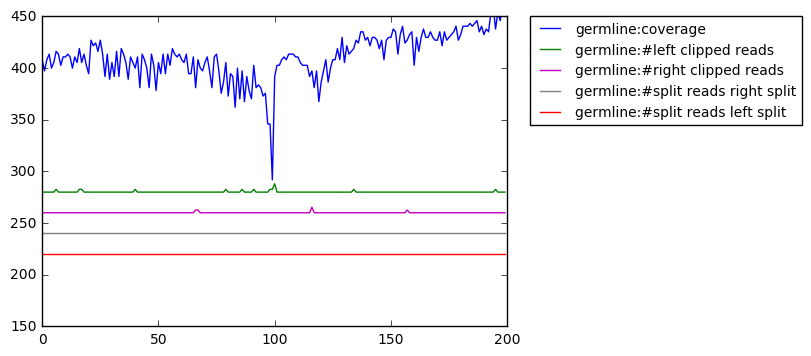

id: 525
Nanopore: noSV


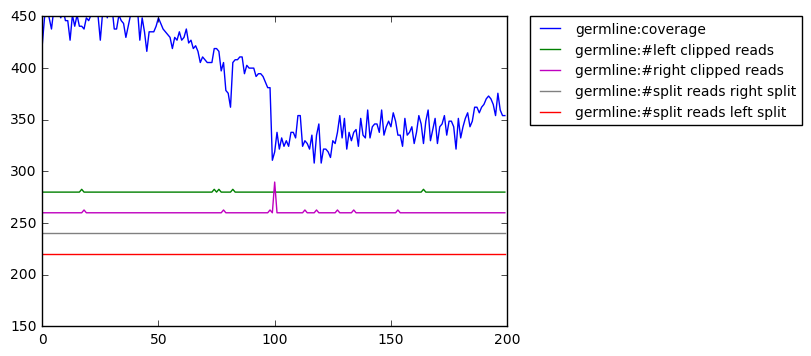

id: 526
Nanopore: noSV


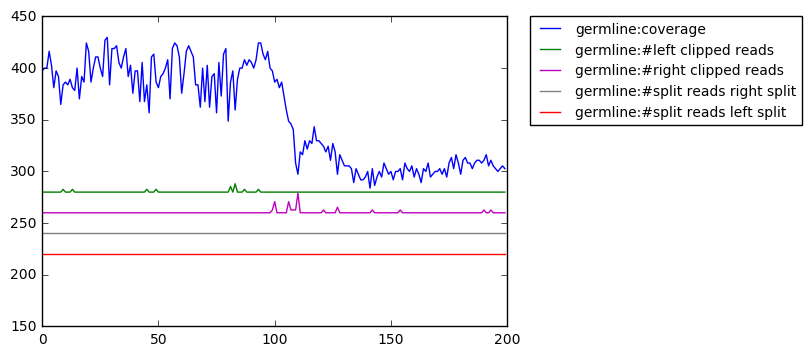

id: 527
Nanopore: noSV


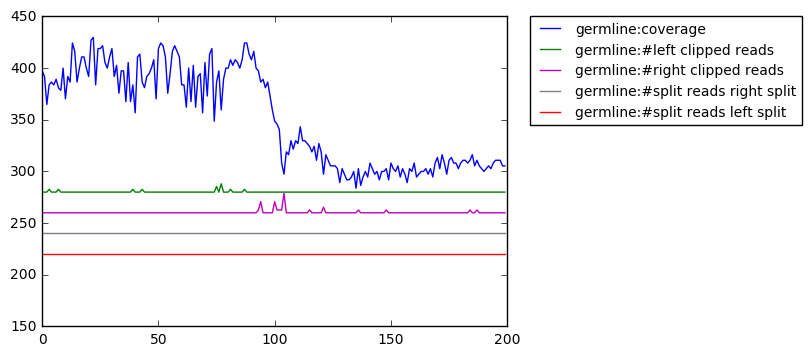

id: 528
Nanopore: noSV


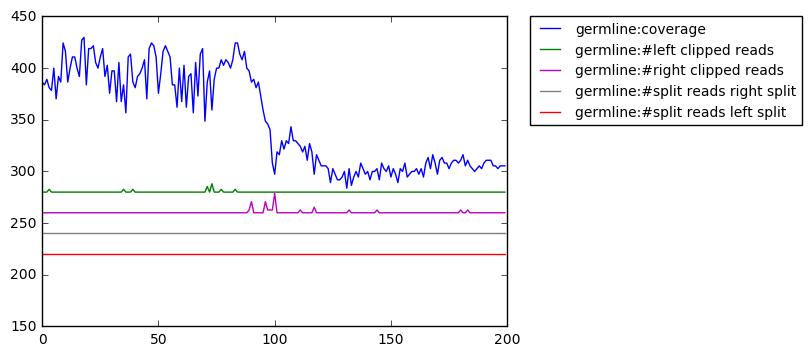

id: 529
Nanopore: noSV


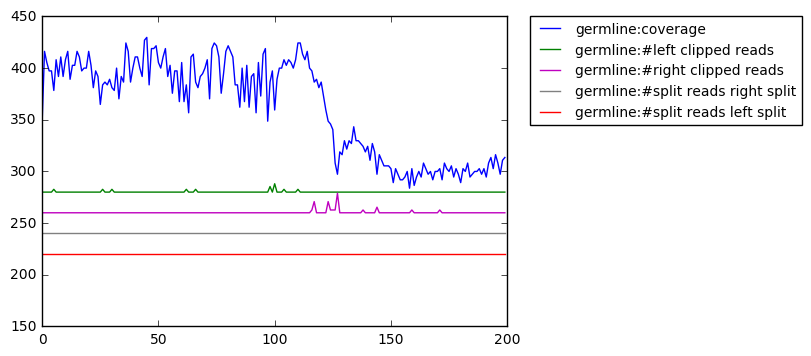

id: 530
Nanopore: noSV


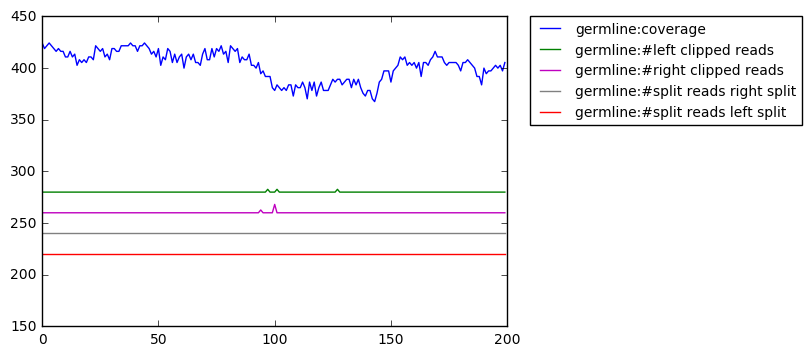

id: 531
Nanopore: noSV


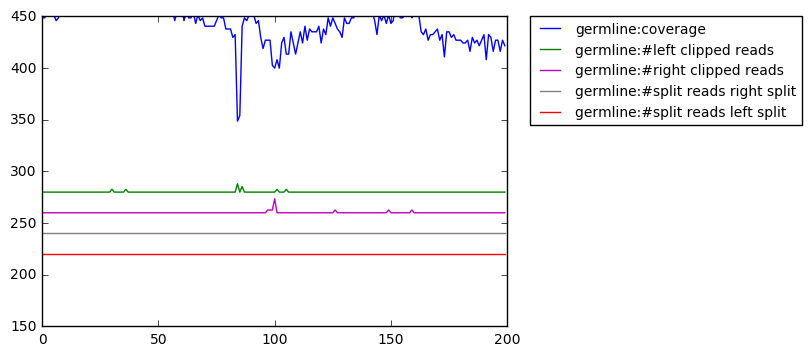

id: 532
Nanopore: noSV


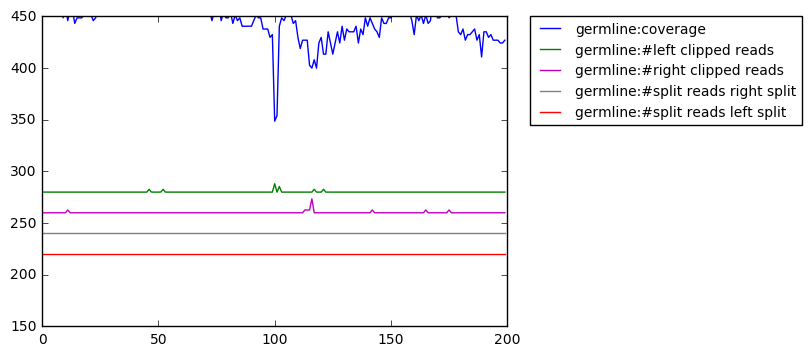

id: 533
Nanopore: noSV


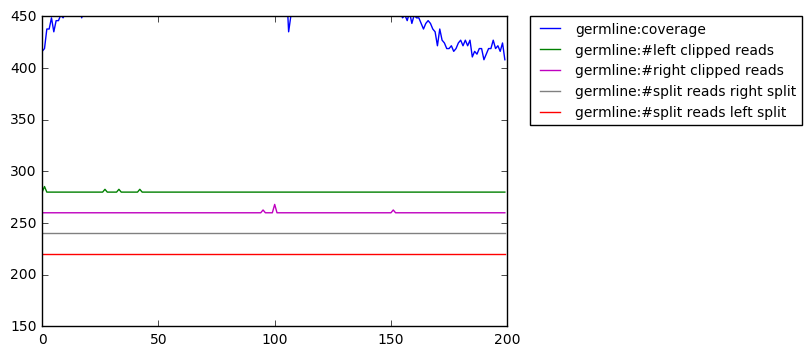

id: 534
Nanopore: noSV


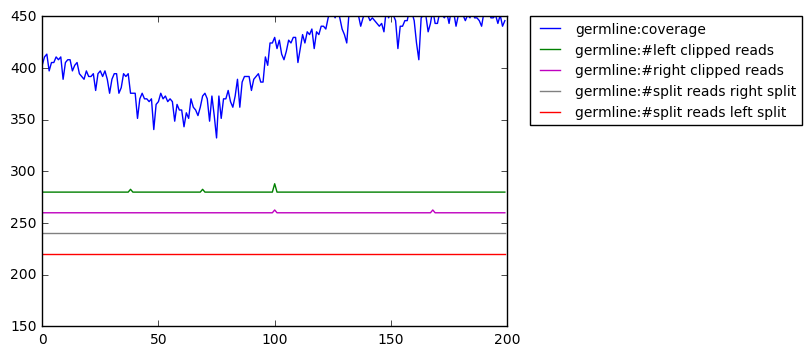

id: 535
Nanopore: noSV


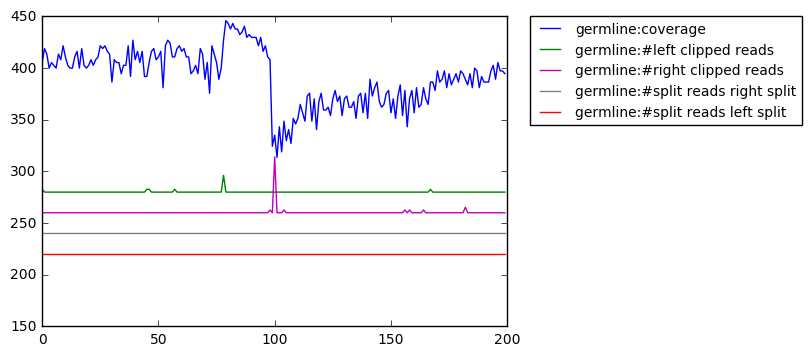

id: 536
Nanopore: noSV


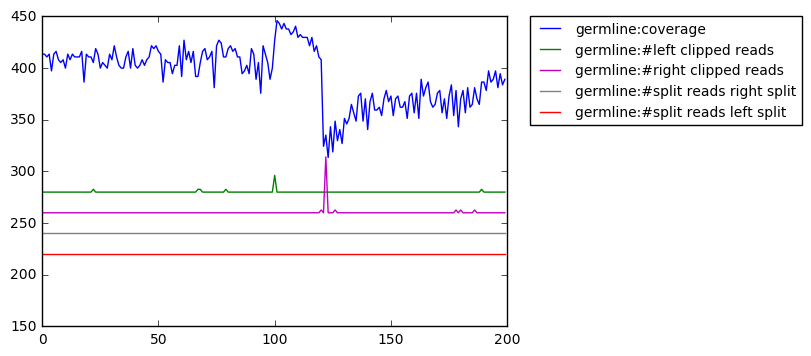

id: 537
Nanopore: noSV


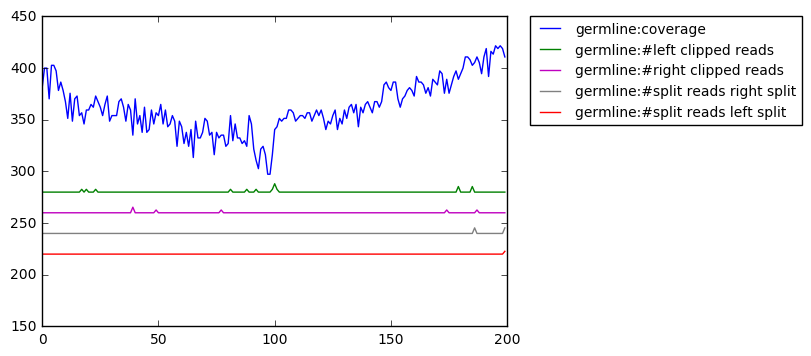

id: 538
Nanopore: noSV


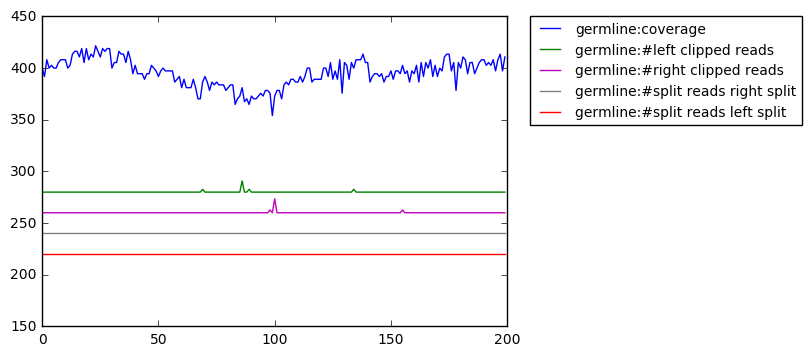

id: 539
Nanopore: noSV


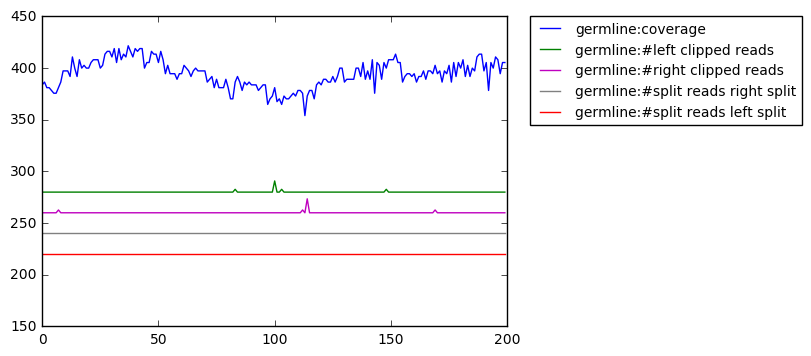

id: 540
Nanopore: noSV


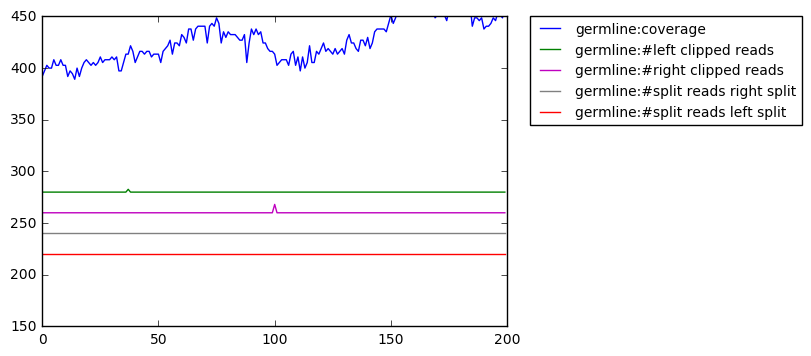

id: 541
Nanopore: noSV


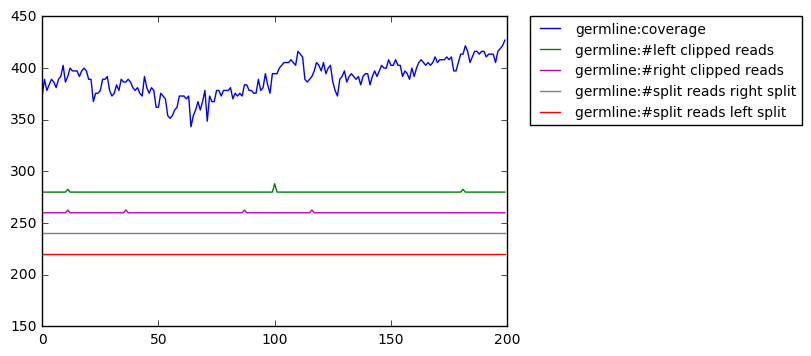

id: 542
Nanopore: noSV


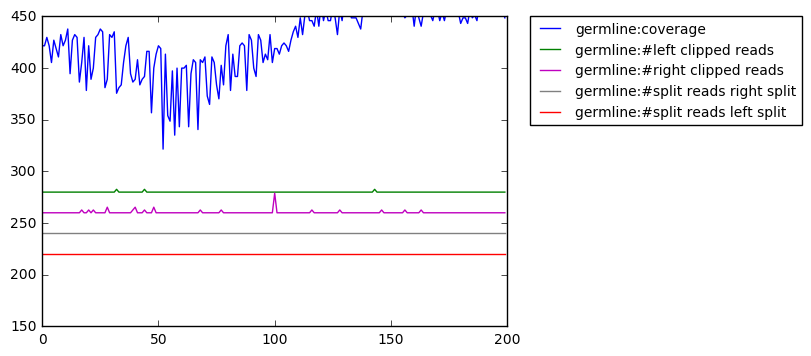

id: 543
Nanopore: noSV


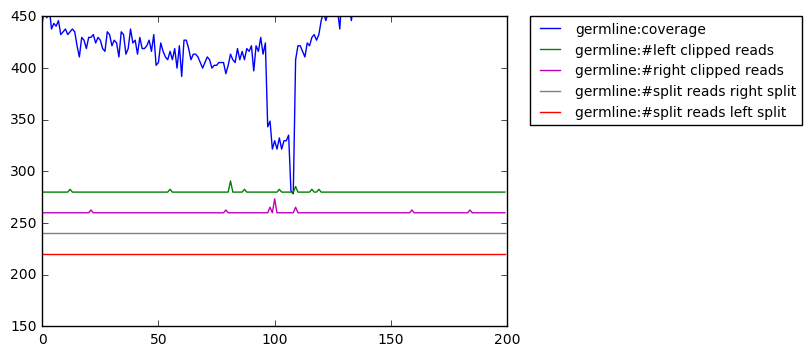

id: 544
Nanopore: noSV


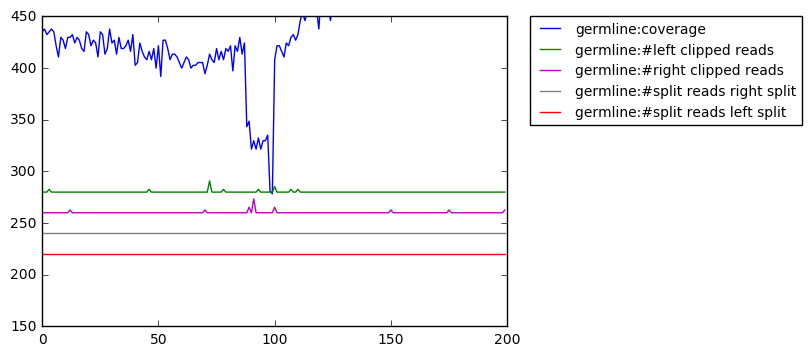

id: 545
Nanopore: noSV


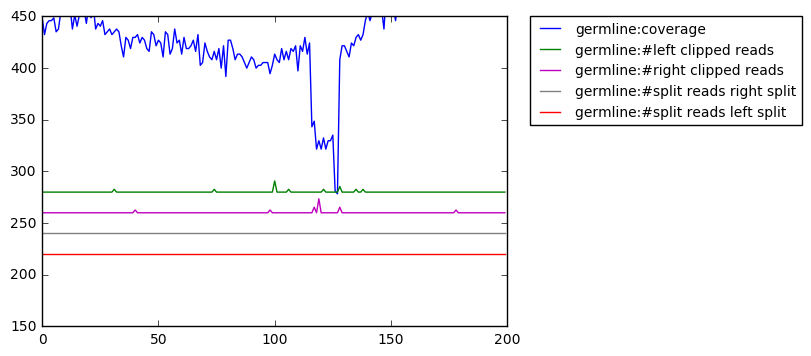

id: 546
Nanopore: noSV


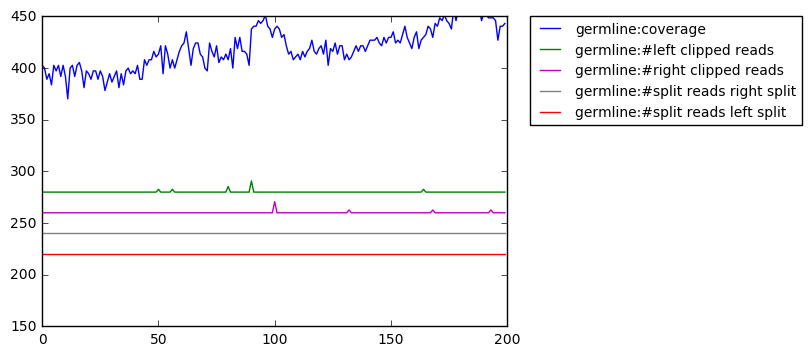

id: 547
Nanopore: noSV


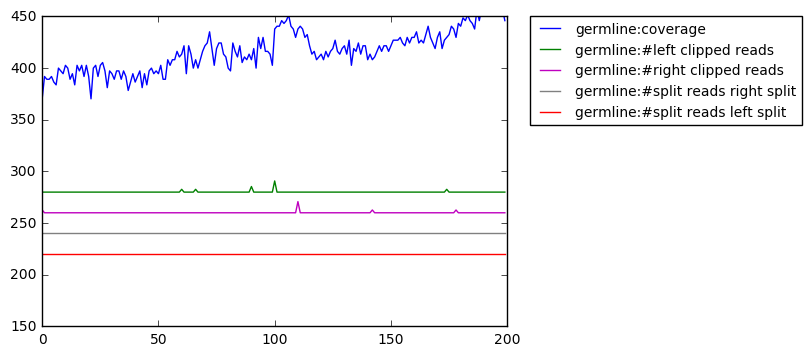

id: 548
Nanopore: noSV


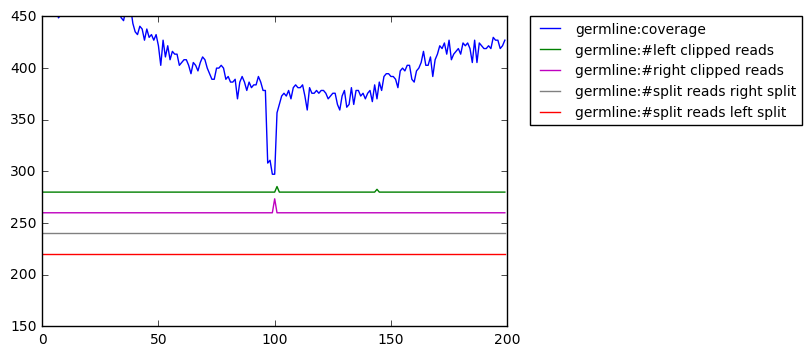

id: 549
Nanopore: noSV


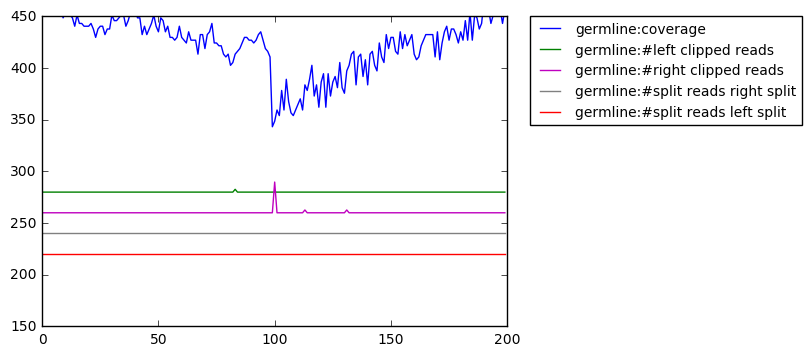

In [57]:
n_windows = 50
start_window = 500
plot_channels(start_window, n_windows)

   
## Transposes every window in X, to comply to McFly format

In [212]:
def transposeDataset(X):
    image = []
    for i in range (0, len(X -1)):
        tr = X[i].transpose()
        image.append(tr)
    return np.array(image)

image1 = transposeDataset(X_train)
image2 = transposeDataset(X_val)
image3 = transposeDataset(X_test)
X_train = image1
X_val = image2
X_test = image3

n_channels = len(X_train[0][0])
print(len(X_test[0][0]))

199


## Prepare the labels in McFly format

In [115]:
mapclasses = {'DEL_start': 1, 'DEL_end': 0,  'noSV': 2}
print(mapclasses)

{'noSV': 2, 'DEL_end': 0, 'DEL_start': 1}


In [116]:
y_train = np.array([mapclasses[c] for c in y_train], dtype='int')
y_val = np.array([mapclasses[c] for c in y_val], dtype='int')
y_test = np.array([mapclasses[c] for c in y_test], dtype='int')
y_train_binary = to_categorical(y_train)
y_val_binary = to_categorical(y_val)
y_test_binary = to_categorical(y_test)

In [117]:
y_test_binary

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.]])

In [118]:
y_val_binary

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.]])

In [119]:
X_train.shape

(2400, 199, 5)

##  Generate and train neural networks 

In [120]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution1D, Flatten, MaxPooling1D
from keras.optimizers import Adam
import sys
import os
import numpy as np
sys.path.insert(0, os.path.abspath('..'))
from mcfly import modelgen, find_architecture

In [121]:
np.random.seed = 321
num_classes = y_train_binary.shape[1]

%%time
models = modelgen.generate_models(X_train.shape,
                                  num_classes,
                                  number_of_models = 1,
                                  model_type = 'CNN',
                                  cnn_min_layers=1,
                                  cnn_max_layers=1,
                                  cnn_min_filters = 3, 
                                  cnn_max_filters = 3, 
                                  cnn_min_fc_nodes=2, 
                                  cnn_max_fc_nodes=2,
                                  low_lr=1.73, high_lr=1.73,
                                  kernel_size = 11)

In [191]:
%%time
models = modelgen.generate_models(X_train.shape,
                                  num_classes,
                                  number_of_models = 1,
                                  model_type = 'CNN',
                                  cnn_min_layers=2,
                                  cnn_max_layers=2,
                                  cnn_min_filters = 4, 
                                  cnn_max_filters = 4, 
                                  cnn_min_fc_nodes=6, 
                                  cnn_max_fc_nodes=6,
                                  low_lr=2, high_lr=2,
                                  kernel_size = 7)

Wall time: 1.07 s


In [192]:
%%time
i=0
for model, params, model_types in models:
    print('model ' + str(i))
    i=i+1
    print(params)
    model.summary()

model 0
{'learning_rate': 0.01, 'fc_hidden_nodes': 6, 'regularization_rate': 0.00449221542885291, 'kernel_size': 7, 'filters': array([4, 4])}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_13 (Batc (None, 199, 5)            20        
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 199, 4)            144       
_________________________________________________________________
batch_normalization_14 (Batc (None, 199, 4)            16        
_________________________________________________________________
activation_13 (Activation)   (None, 199, 4)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 199, 4)            116       
_________________________________________________________________
batch_normalization_15 (Batc (None, 199, 4)            16        


In [124]:
train_set_size = X_train.shape[0]
train_set_size

2400

In [201]:
%%time
histories, val_accuracies, val_losses = find_architecture.train_models_on_samples(X_train, y_train_binary,
                                                                                 X_val, y_val_binary,
                                                                                 models,nr_epochs=1, 
                                                                                 subset_size=train_set_size,
                                                                                 verbose=True)

Training model 0 CNN
Train on 2400 samples, validate on 525 samples
Epoch 1/1
2400/2400 [==============================] - 2s 689us/step - loss: 0.2016 - acc: 0.9617 - val_loss: 0.2239 - val_acc: 0.9524
Wall time: 1.66 s


## Save the best model

In [202]:
best_model_index = np.argmax(val_accuracies)
best_model, best_params, best_model_types = models[best_model_index]
print(best_model_index, best_model_types, best_params)

0 CNN {'learning_rate': 0.01, 'fc_hidden_nodes': 6, 'regularization_rate': 0.00449221542885291, 'kernel_size': 7, 'filters': array([4, 4])}


In [203]:
from keras.models import load_model

model_path = os.path.join('F:/CNN/notebooks/', 'Gtcg_13_9')

best_model.save(model_path)

## Train the best model on the full dataset

In [ ]:
#We make a copy of the model, to start training from fresh
nr_epochs = 1
datasize = train_set_size # Change in `X_train.shape[0]` if training complete data set
history = best_model.fit(X_train[:datasize,:,:], y_train_binary[:datasize,:],
              epochs=nr_epochs, validation_data=(X_val, y_val_binary))

## Reload the trained model

In [204]:
import os
from keras.models import load_model
model_path = os.path.join('F:/CNN/notebooks/',  'Gtcg_13_9')
model_reloaded = load_model(model_path)

## Inspect model predictions on test data

In [205]:

model = model_reloaded 
datasize = X_test.shape[0]
probs = model.predict_proba(X_test[:datasize,:,:],batch_size=1)

## Columns are predicted labels by DeepSV, rows are nanopore labels

In [206]:
mapclasses = {'DEL_end': 0, 'DEL_start': 1, 'noSV': 2}
dict=mapclasses
dict_sorted = sorted(dict.items(), key=lambda x: x[1])
dict_sorted

[('DEL_end', 0), ('DEL_start', 1), ('noSV', 2)]

In [207]:
labels = [i[0] for i in dict_sorted]

In [208]:
import pandas as pd
predicted = probs.argmax(axis=1)
y_index = y_test_binary.argmax(axis=1)
confusion_matrix = pd.crosstab(pd.Series(y_index), pd.Series(predicted))
confusion_matrix.index = [labels[i] for i in confusion_matrix.index]
confusion_matrix.columns = [labels[i] for i in confusion_matrix.columns]
confusion_matrix.reindex(columns=[l for l in labels], fill_value=0)
confusion_matrix

,DEL_end,DEL_start,noSV
DEL_end,175,2,4
DEL_start,1,194,6
noSV,0,3,188


## Test best current model on testset

### Overall accuracy on the test set:

In [209]:
%%time
score_test = model.evaluate(X_test, y_test_binary, verbose=False)
print('Test loss and accuracy of best model: ' + str(score_test))

Test loss and accuracy of best model: [0.18650472140749089, 0.97207678883071558]
Wall time: 456 ms
